In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

%matplotlib inline

In [48]:
x = np.linspace(0, 10, 300)

def func(x):
    return x*np.cos((x-9))

In [79]:
def get_derivative(func, x0=0, degree=1):
    '''Get the derivative at x0 of n-th degree'''
    x = np.linspace(x0-6, x0+6, 3000)
    dx = x[1]-x[0]
    y = func(x)
    for i in range(degree):
        y = np.gradient(y, dx)
    closest_to_0_x = min(x, key=lambda x: abs(x - x0))
    zero_index_in_x = np.where(x==closest_to_0_x)[0][0]
    return y[zero_index_in_x]

def get_slope(x, x0):
    '''Get a linear slope function at point x0'''
    b = get_derivative(func, x0=x0)
    a = func(x0) - get_derivative(func, x0=x0)*x0
    x = np.array(x)
    return a + x*b

def gradient_descent(func, start, step_size, stop=0.01):
    '''Get a list of values representing steps in 1-d gradient descent'''
    container = [start]
    while True:  
        step = get_derivative(func, start)*step_size
        if step < stop: # early stopping
            break
        start = start - step
        container.append(start)
    return np.array(container)

In [114]:
gradient_descent(func, 8, 0.1, 0.001)

array([8.        , 7.27226881, 6.57023373, 6.21802902, 6.09411202,
       6.05031056, 6.03434251, 6.02843816, 6.02624277])

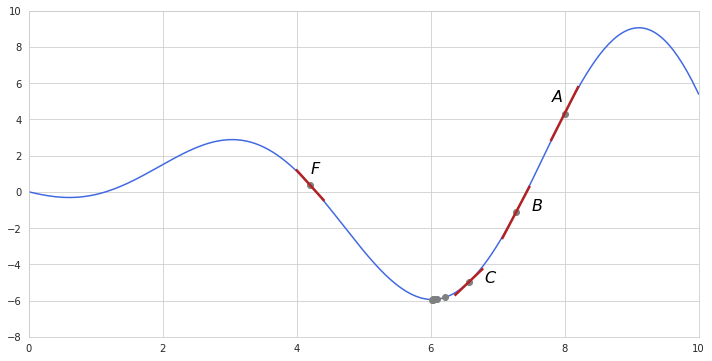

In [117]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(12,6))

# function
ax.plot(x, func(x), color='royalblue')

gr_desc_points = gradient_descent(func, 8, 0.1, 0.001)
ax.scatter(gr_desc_points, func(gr_desc_points), color='grey', zorder=5)

# plot example of a slope at points
ax.plot([7.8, 8.2], get_slope([7.8, 8.2], 8), color='firebrick', linewidth=2.5, zorder=6)
ax.text(7.8, 5, '$A$', size=16)
ax.plot([7.072, 7.472], get_slope([7.072, 7.472], 7.272), color='firebrick', linewidth=2.5, zorder=6)
ax.text(7.5, -1, '$B$', size=16)
ax.plot([6.37, 6.77], get_slope([6.37, 6.77], 6.57), color='firebrick', linewidth=2.5, zorder=6)
ax.text(6.8, -5, '$C$', size=16)

ax.scatter([4.2], func(4.2), color='grey', zorder=5)
ax.plot([4, 4.4], get_slope([4, 4.4], 4.2), color='firebrick', linewidth=2.5, zorder=6)
ax.text(4.2, 1, '$F$', size=16)

ax.set_xlim(0, 10)
ax.set_ylim(-8, 10)
plt.savefig('../../assets/images/optimization/gradient_descent_example.png', bbox_inches='tight');

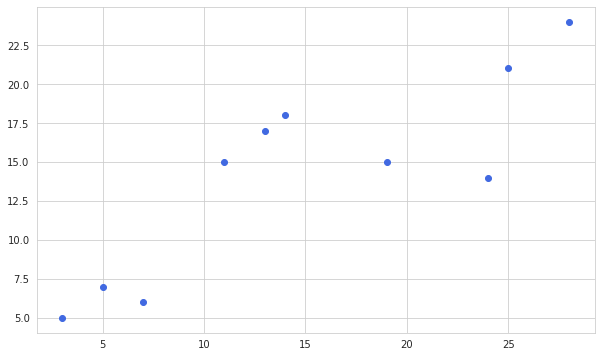

In [2]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(10,6))
x = np.array([3, 5, 7, 11, 13, 14, 19, 24, 25, 28])
y = np.array([5, 7, 6, 15, 17, 18, 15, 14, 21, 24])
ax.scatter(x, y, color='royalblue')
plt.savefig('../../assets/images/regression/some_linear_distribution.png', bbox_inches='tight');

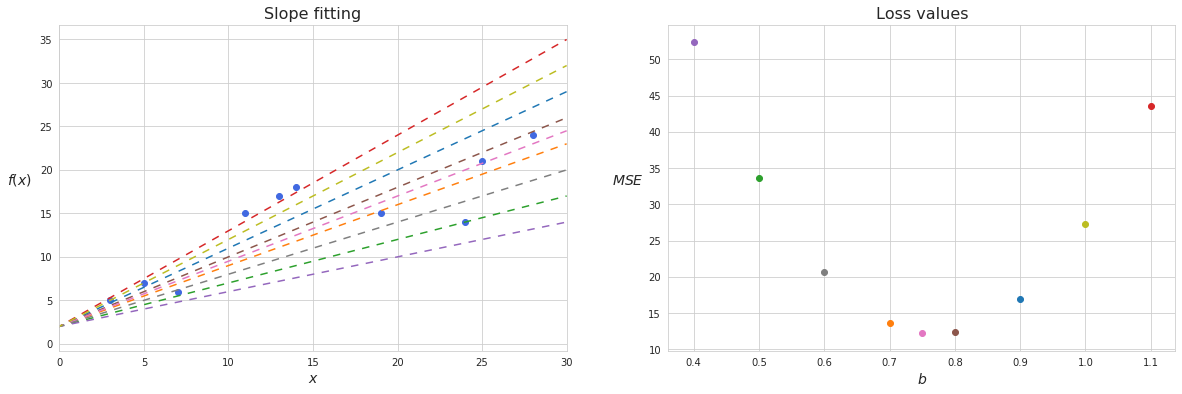

In [3]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(1, 2, figsize=(20,6))
x = np.array([3, 5, 7, 11, 13, 14, 19, 24, 25, 28])
y = np.array([5, 7, 6, 15, 17, 18, 15, 14, 21, 24])
ax[0].scatter(x, y, color='royalblue')

a = 2
x_s = np.linspace(-1, 30, 600)

# guess 1
bs = [0.9, 0.7, 0.5, 1.1, 0.4, 0.8, 0.75, 0.6, 1]
for b in bs:
    y1 = a + x_s * b
    ax[0].plot(x_s, y1, linestyle='--', dashes=(5,5))

    y1_s = a + x * b
    p_1 = np.sum((y1_s - y)**2) / len(y)
    ax[1].scatter(b, p_1)

ax[0].set_xlim(0, 30)
ax[0].set_xlabel('$x$', fontsize=14)
ax[0].set_ylabel('$f(x)$', fontsize=14, rotation=0, labelpad=20)

ax[1].set_xlabel('$b$', fontsize=14)
ax[1].set_ylabel('$MSE$', fontsize=14, rotation=0, labelpad=20)

ax[0].set_title('Slope fitting', fontsize=16)
ax[1].set_title('Loss values', fontsize=16)
plt.savefig('../../assets/images/regression/loss_values_and_slope.png', bbox_inches='tight');

## Plot momentum gradient descent

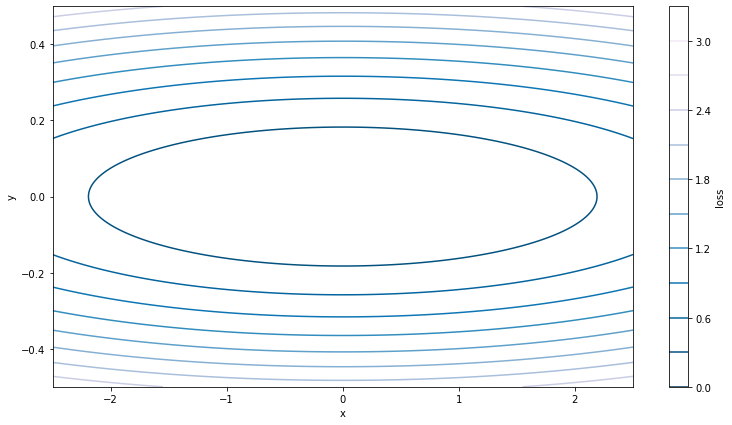

In [19]:
class LossSurface:
    """A loss surface with L(x, y) = a * x ^2 + b * y ^2.
    """
    def __init__(self, a, b):
        self.a = a
        self.b = b

        N = 1000
        x_list = np.linspace(-3.5, 3.5, N)
        y_list = np.linspace(-0.5, 0.5, N)
        self.X, self.Y = np.meshgrid(x_list, y_list)
        self.Z = self.a * (self.X ** 2) + self.b * (self.Y ** 2)

    def plot(self):
        fig, ax = plt.subplots(figsize=(13, 7))
        cmap = cm.get_cmap('PuBu_r')
        cp = ax.contour(self.X, self.Y, self.Z, 10, cmap=cmap)
        cbar = fig.colorbar(cp)
        cbar.set_label('Loss')

        ax.set_xlim(-2.5, 2.5)
        ax.set_ylim(-0.5, 0.5)

        ax.set_xlabel('x')
        ax.set_ylabel('y')

        return fig, ax


loss_surface = LossSurface(1/16, 9)
fig, ax = loss_surface.plot()

Gradient Descent: -3.73, 82.80 73
Least Squares: -3.71, 82.90


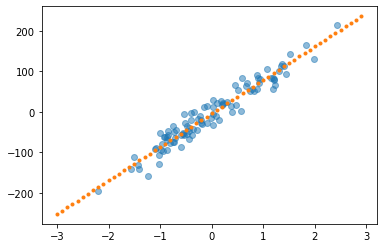

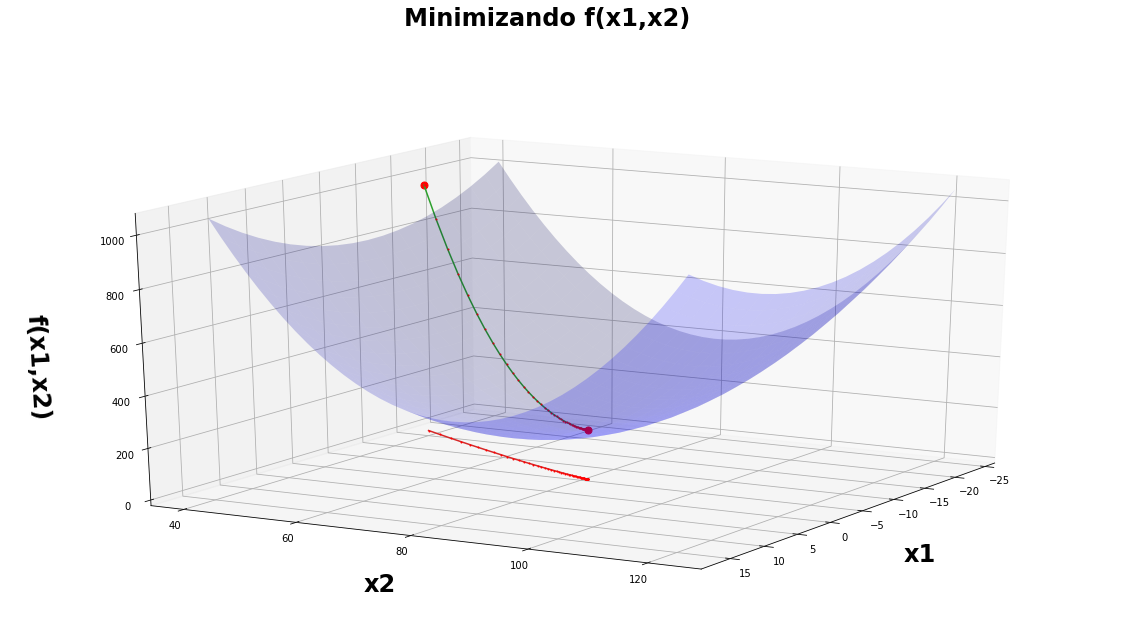

In [24]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 

from sklearn.datasets import make_regression 



x, y = make_regression(n_samples = 100, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2017)
x = x.flatten()
slope, intercept, _,_,_ = stats.linregress(x,y)
best_fit = np.vectorize(lambda x: x * slope + intercept)
plt.plot(x,y, 'o', alpha=0.5)
grid = np.arange(-3,3,0.1)
plt.plot(grid,best_fit(grid), '.')

def gradient_descent(x, y, theta_init, step=0.001, maxsteps=0, precision=0.001, ):
    costs = []
    m = y.size # number of data points
    theta = theta_init
    history = [] # to store all thetas
    preds = []
    counter = 0
    oldcost = 0
    pred = np.dot(x, theta)
    error = pred - y 
    currentcost = np.sum(error ** 2) / (2 * m)
    preds.append(pred)
    costs.append(currentcost)
    history.append(theta)
    counter+=1
    while abs(currentcost - oldcost) > precision:
        oldcost=currentcost
        gradient = x.T.dot(error)/m 
        theta = theta - step * gradient  # update
        history.append(theta)
        
        pred = np.dot(x, theta)
        error = pred - y 
        currentcost = np.sum(error ** 2) / (2 * m)
        costs.append(currentcost)
        
        if counter % 25 == 0: preds.append(pred)
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, preds, counter
xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step=0.1)
theta = history[-1]
print("Gradient Descent: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], iters))
print("Least Squares: {:.2f}, {:.2f}".format(intercept, slope))


from mpl_toolkits.mplot3d import Axes3D

def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(xaug, y, theta) 
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
#ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('x1', labelpad=30, fontsize=24, fontweight='bold')
ax.set_ylabel('x2', labelpad=30, fontsize=24, fontweight='bold')
ax.set_zlabel('f(x1,x2)', labelpad=30, fontsize=24, fontweight='bold')
ax.view_init(elev=20., azim=30)
ax.plot([theta[0]], [theta[1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)


ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)
ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)

fig.suptitle("Minimizando f(x1,x2)", fontsize=24, fontweight='bold');

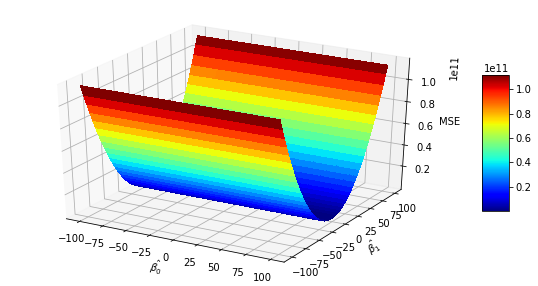

In [23]:
X = np.random.randint(0, 100, 100)
beta_0 = beta_1 = np.arange(-100, 100, 1)

# All combinations of beta_0 and beta_1
plt_beta_0, plt_beta_1 = np.meshgrid(beta_0, beta_1)

def calculate_mse(beta_0, beta_1):
    y_hat = beta_0 + beta_1 * X**2
    error = y_hat - y
    sse = np.sum(error ** 2)
    return ((1 / (2 * len(X))) * sse)

calculate_mse_v = np.vectorize(calculate_mse)
mse = calculate_mse_v(plt_beta_0, plt_beta_1).reshape(len(plt_beta_0), len(plt_beta_1))

fig = plt.figure(figsize=(10, 5))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(plt_beta_0,
                       plt_beta_1,
                       mse,
                       cmap=cm.jet,
                       linewidth=0,
                       antialiased=False)
ax.set_xlabel(r'$\hat{\beta_0}$')
ax.set_ylabel(r'$\hat{\beta_1}$')
ax.set_zlabel(r'MSE')
fig.colorbar(surf, shrink=0.5, aspect=5)

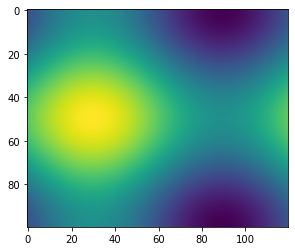

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)
ani.save("movie.mp4")